#### Question 1
Use a real-world dataset (i.e. relational, text, image, video, voice files), prepare the dataset for modelling, consider one categorical variable in the dataset, and apply the classification task. To do so:  

* Provide the functional form of the predictive model for each algorithm.
* Train each model using different ratios of the trainset and visualize the performance of models using accuracy (y -axis) in terms of different ratio of trainsets (x-axis). Elaborate on the insights.
* Apply ensemble methods (bagging, boosting, stacking) on the base models, evaluate the performance of each ensemble technique in 100 Monte Carlo runs and visualize the performance of models using Boxplot.
* Select the best classifier and elaborate on its advantages and limitations.

Data Set Information : 

* URL : https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

#### Imports

In [251]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB

In [224]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Options
SVC, GNB, Dicesiontree

In [225]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [226]:
len(df.columns), len(df)

(14, 303)

In [227]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [228]:
X = df.drop("output", axis=1)
y = df["output"]

In [229]:
y.value_counts()

1    165
0    138
Name: output, dtype: int64

In [230]:
clfs = {
    "RF" : RandomForestClassifier(),
    "DT" : DecisionTreeClassifier(),
    "SVC" : SVC(probability=True, kernel='linear')
    # "GNB" : GaussianNB()
}

In [231]:
# Method to Run Iterations
clf_acc = {}
clf_cv_scores = {}
clf_store = {}
clf_y_test = {}
clf_y_preds = {}
def run_clfs(X, y , split_size, mc_run_limit, ens_bg_clf = False, ens_bo_clf = False, ens_st_clf = False, n_est = 1, cv_val = None, base_learners = None, final_estimator = None):
    for key in clfs:
        for i in range(mc_run_limit):
                clf = clfs[key]
                X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split_size)
                if ens_bg_clf:
                    model = BaggingClassifier(base_estimator = clf, n_estimators = n_est, max_samples = 0.8, max_features= 0.8)
                    dt = model.fit(X_train,y_train)
                elif ens_bo_clf:
                    model = AdaBoostClassifier(base_estimator = clf, n_estimators = n_est)
                    dt = model.fit(X_train,y_train)
                elif ens_st_clf:
                    model = StackingClassifier(estimators=base_learners, final_estimator=final_estimator, cv = cv_val)
                    dt = model.fit(X_train,y_train)
                else:    
                    dt = clf.fit(X_train,y_train)
                y_preds = dt.predict(X_test) 
                actual = y_test
                predicted = y_preds
                accuracy = accuracy_score(actual, predicted)
                if (ens_bg_clf or ens_bo_clf or ens_st_clf):
                    cv_scores = cross_val_score(dt, X, y, scoring='accuracy', cv = cv_val, error_score='raise')
                else:
                    cv_scores = {}
        clf_acc[key] = accuracy
        clf_cv_scores[key] = cv_scores 
        clf_store[key] = dt
        clf_y_test[key] = y_test
        clf_y_preds[key] = y_preds

In [232]:
# Training size 20%, MC runs 100

run_clfs(X, y, 0.2, 100)

In [233]:
pd.DataFrame([clf_acc])

,RF,DT,SVC
0,0.806584,0.802469,0.798354


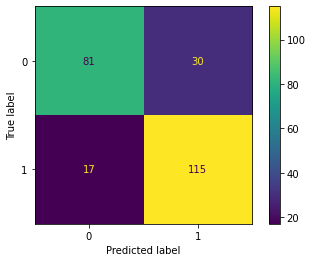

In [234]:
ConfusionMatrixDisplay.from_predictions(y_true = clf_y_test["RF"], y_pred= clf_y_preds["RF"]);

In [235]:
# Training size 50%, MC runs 100
run_clfs(X, y, 0.5, 100)

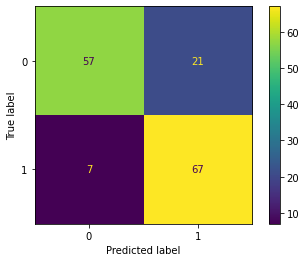

In [236]:
ConfusionMatrixDisplay.from_predictions(y_true = clf_y_test["RF"], y_pred= clf_y_preds["RF"]);

In [237]:
pd.DataFrame([clf_acc])

,RF,DT,SVC
0,0.815789,0.730263,0.796053


In [238]:
# Ensamble Bagging for 100 MC runs
run_clfs(X, y, 0.2, 100, ens_bg_clf=True)
clf_cv_scores_bag = clf_cv_scores


In [239]:
pd.DataFrame([clf_acc])

,RF,DT,SVC
0,0.781893,0.769547,0.757202


In [240]:
# Ensamble Boosting for 100 MC runs
run_clfs(X, y, 0.2, 100, ens_bo_clf= True)
clf_cv_scores_bo = clf_cv_scores

In [241]:
pd.DataFrame([clf_acc])

,RF,DT,SVC
0,0.794239,0.707819,0.736626


In [242]:
base_learners = [
                 ('cf_1', RandomForestClassifier(n_estimators=10, random_state=42)),
                 ('cf_2', DecisionTreeClassifier()),             
                 ('cf_3', SVC())             
                ]
final_estimator = LogisticRegression()

In [243]:
run_clfs(X, y, 0.2, 100, ens_st_clf = True, cv_val = 5, base_learners = base_learners, final_estimator = final_estimator)
clf_cv_scores_scatter = clf_cv_scores

In [244]:
pd.DataFrame([clf_acc])

,RF,DT,SVC
0,0.679012,0.728395,0.720165


[Text(0.5, 1.0, 'Stacking Approch'),
 Text(0.5, 0, 'Cross Validation Scores'),
 Text(0, 0.5, 'Model Performance')]

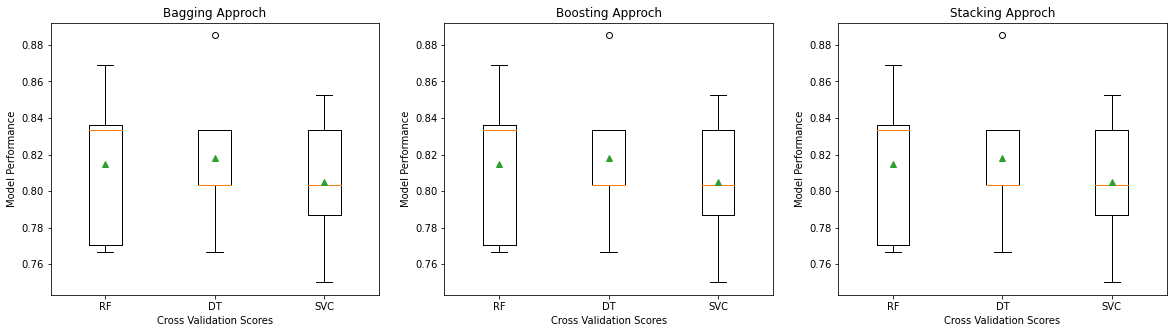

In [264]:
fig , (ax0, ax1, ax2) = plt.subplots(nrows=1,ncols=3,figsize=(20,5))

ax0.boxplot(clf_cv_scores_bag.values(), labels = clf_cv_scores_bag.keys(), showmeans = True);
ax0.set(title="Bagging Approch", xlabel="Cross Validation Scores", ylabel="Model Performance")
ax1.boxplot(clf_cv_scores_bo.values(), labels = clf_cv_scores_bo.keys(), showmeans = True);
ax1.set(title="Boosting Approch", xlabel="Cross Validation Scores", ylabel="Model Performance")
ax2.boxplot(clf_cv_scores_scatter.values(), labels = clf_cv_scores_scatter.keys(), showmeans = True);
ax2.set(title="Stacking Approch", xlabel="Cross Validation Scores", ylabel="Model Performance")